In [48]:
!pip install arch

In [52]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

In [53]:
# Set plotting style
sns.set(style="whitegrid")

In [54]:
# Step 1: Download Historical Data
ticker = "TSLA"
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [55]:
# Check data structure
print(data.head())
print(data.info())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  229.456665  230.806671  219.806671  220.583328  220.583328   
2021-04-05  235.903336  236.053329  228.233337  230.350006  230.350006   
2021-04-06  230.100006  232.183334  227.123337  230.539993  230.539993   
2021-04-07  229.000000  230.460007  222.613327  223.656662  223.656662   
2021-04-08  225.793335  229.850006  223.883331  227.933334  227.933334   

               Volume  
Date                   
2021-04-01  105895200  
2021-04-05  125528400  
2021-04-06   84815400  
2021-04-07   78928200  
2021-04-08   71772900  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-04-01 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null  

In [56]:
# Step 2: Calculate Returns
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()  # Convert to percentage returns

In [57]:
# Step 3: Fit an ARCH Model
print("\nFitting ARCH Model...")
arch_model_fit = arch_model(returns, vol='ARCH', p=1).fit(disp='off')
print("ARCH Model Summary:")
print(arch_model_fit.summary())


Fitting ARCH Model...
ARCH Model Summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2023.33
Distribution:                  Normal   AIC:                           4052.66
Method:            Maximum Likelihood   BIC:                           4066.53
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        09:07:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0337      

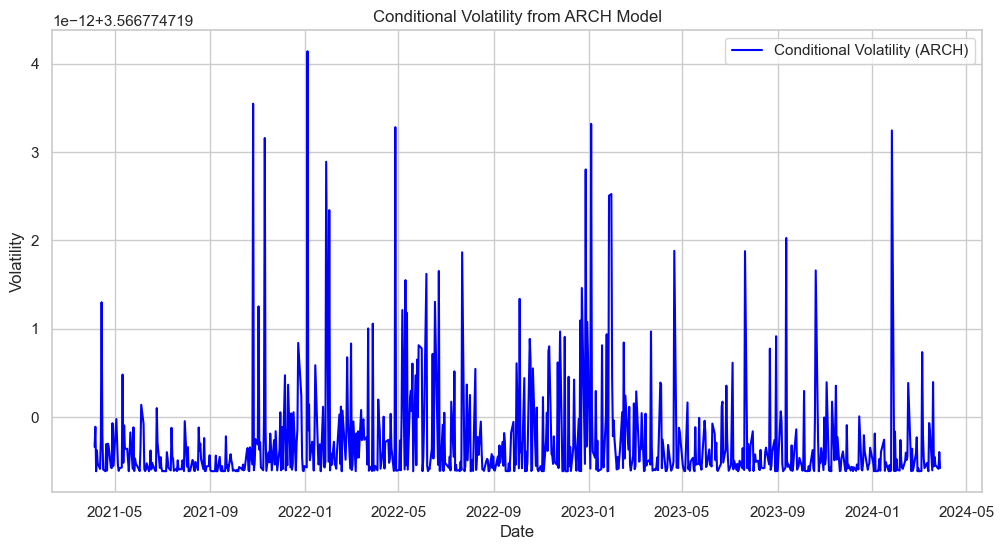

In [58]:
# Plot the conditional volatility from the ARCH model
plt.figure(figsize=(12, 6))
plt.plot(arch_model_fit.conditional_volatility, label='Conditional Volatility (ARCH)', color='blue')
plt.title('Conditional Volatility from ARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Check residuals for autocorrelation
ljungbox_arch = acorr_ljungbox(arch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for ARCH Model Residuals:")
print(ljungbox_arch)


Ljung-Box Test for ARCH Model Residuals:
     lb_stat  lb_pvalue
10  21.55807   0.017521


In [60]:
# Step 4: Fit a GARCH Model
print("\nFitting GARCH Model...")
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print("GARCH Model Summary:")
print(garch_model_fit.summary())


Fitting GARCH Model...
GARCH Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2004.58
Distribution:                  Normal   AIC:                           4017.15
Method:            Maximum Likelihood   BIC:                           4035.64
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        09:07:44   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0666    

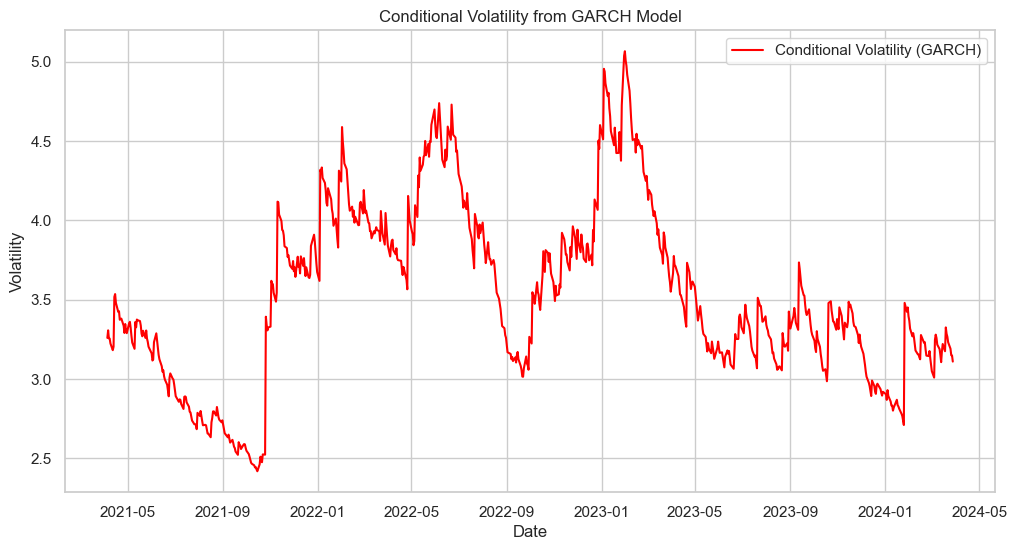

In [61]:
# Plot the conditional volatility from the GARCH model
plt.figure(figsize=(12, 6))
plt.plot(garch_model_fit.conditional_volatility, label='Conditional Volatility (GARCH)', color='red')
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Check residuals for autocorrelation
ljungbox_garch = acorr_ljungbox(garch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for GARCH Model Residuals:")
print(ljungbox_garch)


Ljung-Box Test for GARCH Model Residuals:
     lb_stat  lb_pvalue
10  21.55807   0.017521


In [63]:
# Step 5: Fit GARCH Model with Additional Parameters
print("\nFitting GARCH Model with additional parameters...")
am = arch_model(returns, vol="Garch", p=1, q=1, dist="Normal")
res = am.fit(update_freq=5)


Fitting GARCH Model with additional parameters...
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2006.0309912410062
Iteration:     10,   Func. Count:     63,   Neg. LLF: 2004.5755308148487
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2004.575528033089
            Iterations: 12
            Function evaluations: 72
            Gradient evaluations: 12


In [64]:
# Print forecast details
forecast_mean = res.forecast().mean
forecast_residual_variance = res.forecast().residual_variance
forecast_variance = res.forecast().variance

print("\nForecast Mean (last 3 periods):")
print(forecast_mean.iloc[-3:])
print("Forecast Residual Variance (last 3 periods):")
print(forecast_residual_variance.iloc[-3:])
print("Forecast Variance (last 3 periods):")
print(forecast_variance.iloc[-3:])


Forecast Mean (last 3 periods):
                 h.1
Date                
2024-03-28  0.066586
Forecast Residual Variance (last 3 periods):
                 h.1
Date                
2024-03-28  9.582995
Forecast Variance (last 3 periods):
                 h.1
Date                
2024-03-28  9.582995


In [65]:
# Forecasting with a horizon of 90 days
print("\nForecasting 90 days ahead...")
forecasts = res.forecast(horizon=90)


Forecasting 90 days ahead...


In [66]:
# Print forecast residual variance for the 90-day horizon
print("\n90-day Forecast Residual Variance (last 3 periods):")
print(forecasts.residual_variance.iloc[-3:])


90-day Forecast Residual Variance (last 3 periods):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  9.582995  9.635704  9.687495  9.738383  9.788385  9.837516   

                h.07      h.08      h.09       h.10  ...       h.81      h.82  \
Date                                                 ...                        
2024-03-28  9.885792  9.933226  9.979834  10.025629  ...  11.866989  11.87991   

                 h.83       h.84      h.85       h.86       h.87       h.88  \
Date                                                                          
2024-03-28  11.892607  11.905082  11.91734  11.929384  11.941219  11.952848   

                 h.89     h.90  
Date                            
2024-03-28  11.964273  11.9755  

[1 rows x 90 columns]


In [67]:
# Conclusion and Summary
print("\nAnalysis Summary:")
print("1. ARCH and GARCH models were successfully fitted to the returns data.")
print("2. Conditional volatility was plotted for both ARCH and GARCH models.")
print("3. Residuals were checked for autocorrelation using the Ljung-Box test.")
print("4. Forecasts were generated for a 90-day horizon, including variance and residual variance.")



Analysis Summary:
1. ARCH and GARCH models were successfully fitted to the returns data.
2. Conditional volatility was plotted for both ARCH and GARCH models.
3. Residuals were checked for autocorrelation using the Ljung-Box test.
4. Forecasts were generated for a 90-day horizon, including variance and residual variance.
